In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super().__init__()# super().__init__()  is equal to  super(Net,self).__init__() where self is the object of 
        #child class which is used to access proxy objectof Parent class created by super method .
        
        
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        #Default value of stride is (1,1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120,bias=True)
        self.fc2 = nn.Linear(in_features=120, out_features=84,bias=True)
        self.fc3 = nn.Linear(in_features=84, out_features=10,bias=True)

In [3]:
net=Net()
print(net)#this is printed because we have imported Module class of nn package and in this class 
# __repr__() method is overwritten in this class

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [15]:
print(type(net.conv1))
print(type(net))

#this shows how we have accessed conv1 object using net object of Net class
#conv1 is object we defined in our __init__ function is instance of torch.nn.modules.conv.Conv2d class

<class 'torch.nn.modules.conv.Conv2d'>
<class '__main__.Net'>


In [5]:
net.conv2

Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))

In [6]:
net.fc1

Linear(in_features=400, out_features=120, bias=True)

In [7]:
net.fc2

Linear(in_features=120, out_features=84, bias=True)

In [11]:
net.conv1.weight
#this shows how we can access weight object inside conv1 object 

#In output Below Parameter containing: means 
#the tensor printed is a special tensor which will learn the parameter values as we train our model
#adn will try to achieve value in suchway that loss function is minimum

Parameter containing:
tensor([[[[ 0.0075,  0.0335, -0.1391, -0.0149, -0.1629],
          [-0.1959,  0.1182, -0.0761,  0.0762,  0.1352],
          [-0.0243, -0.0360,  0.0667,  0.0257,  0.1274],
          [-0.0624, -0.1421,  0.0845, -0.0670,  0.1104],
          [ 0.1296, -0.0075, -0.0516, -0.1560, -0.0269]]],


        [[[ 0.1445,  0.1893,  0.1091, -0.0712, -0.1071],
          [-0.1056,  0.1350,  0.1746,  0.1655, -0.0128],
          [ 0.0967, -0.1624, -0.0745, -0.1596, -0.1071],
          [ 0.1860,  0.1283, -0.0142,  0.1654,  0.1081],
          [ 0.0328,  0.1840,  0.0240,  0.0701,  0.1680]]],


        [[[-0.0452,  0.0271,  0.0260,  0.0120, -0.0750],
          [ 0.1900, -0.1402,  0.1953, -0.0894, -0.0882],
          [ 0.1345, -0.1941,  0.0107,  0.1984, -0.0967],
          [ 0.0157,  0.0235, -0.0935,  0.0262,  0.0236],
          [-0.0963,  0.0223, -0.1641, -0.0579,  0.1371]]],


        [[[ 0.0804,  0.0354,  0.0147, -0.1890,  0.1929],
          [ 0.1634,  0.0276,  0.0623,  0.0183, -0.0009

In [ ]:
print(net.conv1.weight.shape,'\n')
for i in range(net.conv1.weight.shape[0]):
    print(net.conv1.weight[i].shape)#accessing a specific filter from six filters
type(net.conv1.weight.shape)
#output shows number of output channels,no of input channels,height of kernel,width of kernel

In [21]:
type(net.conv1.weight)
#this shows that weight attribute belongs to Parameter class which is accessed by conv1 object

torch.nn.parameter.Parameter

In [34]:
param=list(net.parameters())
print(len(param))
for param in net.parameters():
    print(param.shape)

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


## This shows that although we have defined :-
## 5 layers(2 convolution layers,3 fully connected layers) 
## We have got 10 parameters because 
## By default for each layer we have Weight tensor and Bias Tensor

In [33]:
for name , param in net.named_parameters():
    print(name ," SHAPE ---> ", param.shape,'\n')

conv1.weight  SHAPE --->  torch.Size([6, 1, 5, 5]) 

conv1.bias  SHAPE --->  torch.Size([6]) 

conv2.weight  SHAPE --->  torch.Size([16, 6, 5, 5]) 

conv2.bias  SHAPE --->  torch.Size([16]) 

fc1.weight  SHAPE --->  torch.Size([120, 400]) 

fc1.bias  SHAPE --->  torch.Size([120]) 

fc2.weight  SHAPE --->  torch.Size([84, 120]) 

fc2.bias  SHAPE --->  torch.Size([84]) 

fc3.weight  SHAPE --->  torch.Size([10, 84]) 

fc3.bias  SHAPE --->  torch.Size([10]) 



In [47]:
input=torch.randn(3)
print(input)
m = nn.functional.relu(input)
print(m)

#Rectifying Negative Input
#This also shows Relu Does not Reduce the size of Input  tensor given to it

tensor([-1.1191, -0.6887,  0.5452])
tensor([0.0000, 0.0000, 0.5452])


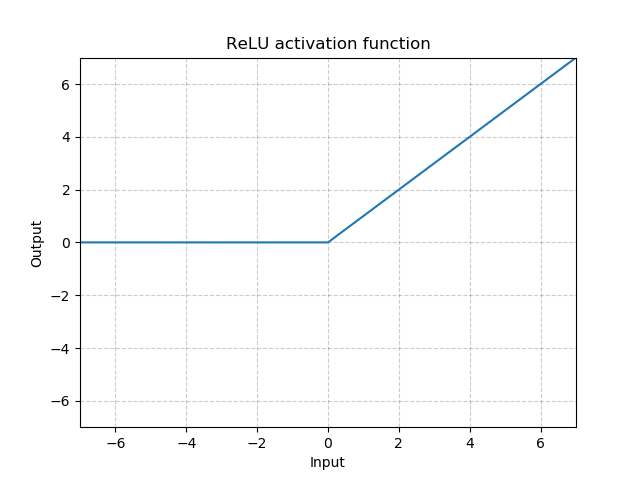

In [26]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        print(x.size(),'\n')
        
        #Activation Functions do not reduce the size of Filter Map Given to Them as Input
        relu_layer_1=F.relu(self.conv1(x))# Activation Relu is applied on First Convolutional Layer(conv1)
        print(relu_layer_1.size(),'\n')#Size has reduced from 32,32 in input to 28,28 after this RELU operation 
        #beacuse Input is First passed from convolution Layer then Relu Layer
        


        # Max pooling over a (2, 2) window
        x = F.max_pool2d(relu_layer_1, (2, 2))# Max Pooling is applied on output of Previous Relu Layer using 2,2 Max Pooling
        # If the size is a square you can only specify a single number
        print(x.size(),'\n')
        
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        print(x.size(),'\n')
        
        x = x.view(-1, self.num_flat_features(x))
        print(x.size(),'\n')
        
        x = F.relu(self.fc1(x))
        print(x.size(),'\n')
        
        x = F.relu(self.fc2(x))
        print(x.size(),'\n')
        
        x = self.fc3(x)
        print(x.size(),'\n')
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
torch.Size([1, 1, 32, 32]) 

torch.Size([1, 6, 28, 28]) 

torch.Size([1, 6, 14, 14]) 

torch.Size([1, 16, 5, 5]) 

torch.Size([1, 400]) 

torch.Size([1, 120]) 

torch.Size([1, 84]) 

torch.Size([1, 10]) 

tensor([[ 0.0609,  0.0825, -0.1024, -0.0584, -0.0075,  0.0338,  0.0135, -0.0606,
          0.1483, -0.1160]], grad_fn=<AddmmBackward>)


In [27]:
net.zero_grad()#Setting Gradient to Zero to Deal with Problem of Accumulating Gradient
out.backward(torch.randn(1, 10))

In [38]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
print(target)
target = target.view(1, -1)  # make it the same shape as output
print(target)
criterion = nn.MSELoss()
print(type(criterion))
loss = criterion(output, target)
print(loss)


torch.Size([1, 1, 32, 32]) 

torch.Size([1, 6, 28, 28]) 

torch.Size([1, 6, 14, 14]) 

torch.Size([1, 16, 5, 5]) 

torch.Size([1, 400]) 

torch.Size([1, 120]) 

torch.Size([1, 84]) 

torch.Size([1, 10]) 

tensor([ 1.1264, -0.6373,  0.0545, -0.8404,  0.6918,  2.2573, -0.5519,  0.6574,
        -0.5386, -0.3174])
tensor([[ 1.1264, -0.6373,  0.0545, -0.8404,  0.6918,  2.2573, -0.5519,  0.6574,
         -0.5386, -0.3174]])
<class 'torch.nn.modules.loss.MSELoss'>
tensor(0.9070, grad_fn=<MseLossBackward>)


## So, when we call loss.backward(), the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that has requires_grad=True will have their .grad Tensor accumulated with the gradient.

In [53]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# To Print whole Graph

In [55]:
def print_graph(g, level=0):
    if g == None: return
    print('*'*level*4, g,'\n')
    for subg in g.next_functions:
        print_graph(subg[0], level+1)

print_graph(loss.grad_fn, 0)


**** <AddmmBackward object at 0x7fbb1164ad30> 

******** <AccumulateGrad object at 0x7fbb1164a748> 

******** <ReluBackward0 object at 0x7fbb1164ab38> 

************ <AddmmBackward object at 0x7fbb1164c518> 

**************** <AccumulateGrad object at 0x7fbb1164cba8> 

**************** <ReluBackward0 object at 0x7fbb1164acc0> 

******************** <AddmmBackward object at 0x7fbb1164a7b8> 

************************ <AccumulateGrad object at 0x7fbb1164a978> 

************************ <ViewBackward object at 0x7fbb1164a898> 

**************************** <MaxPool2DWithIndicesBackward object at 0x7fbb1164a3c8> 

******************************** <ReluBackward0 object at 0x7fbb1164aa58> 

************************************ <MkldnnConvolutionBackward object at 0x7fbb1164a5f8> 

**************************************** <MaxPool2DWithIndicesBackward object at 0x7fbb1164ae80> 

******************************************** <ReluBackward0 object at 0x7fbb1164a198> 

***************************